<a href="https://colab.research.google.com/github/sanjanamonteiro/Task02/blob/main/TASK02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Load your dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 1. Summary statistics
print("Summary statistics:")
print(df.describe().T)
print("\nMissing values:\n", df.isnull().sum())

Summary statistics:
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parc

In [ ]:
# 2. Histograms and Boxplots for numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

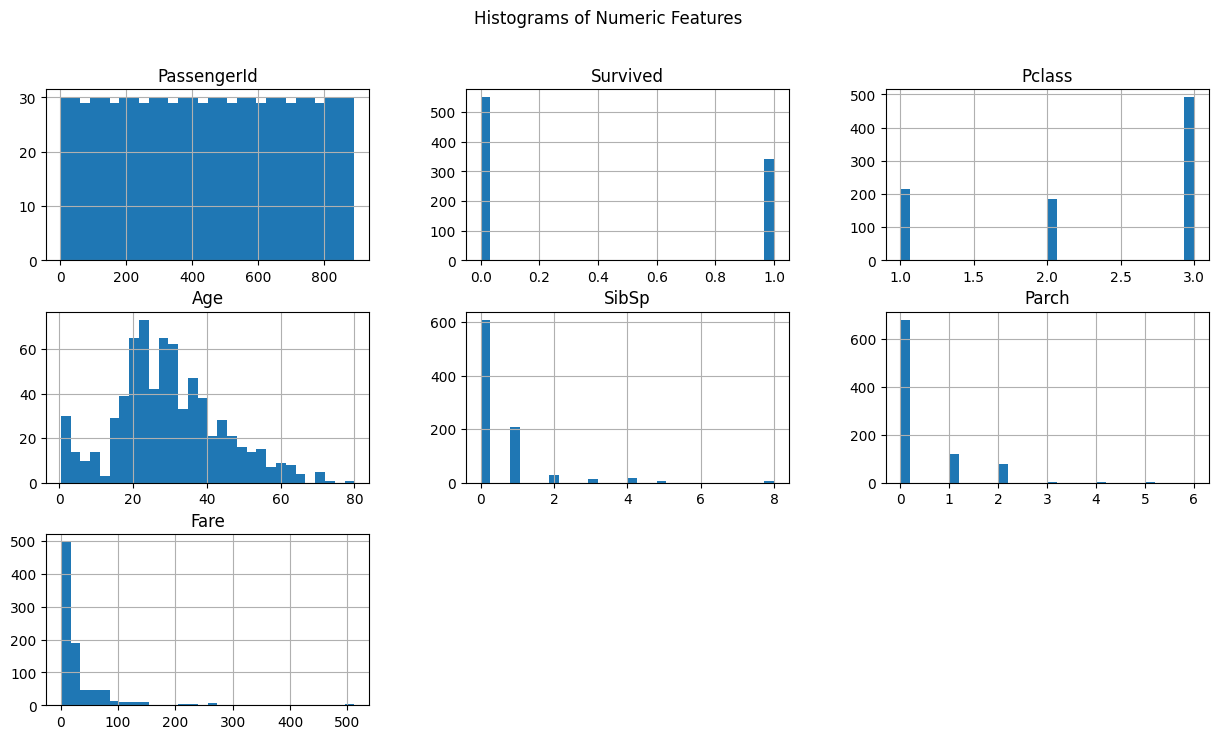

In [ ]:
# Histograms
df[numeric_cols].hist(bins=30, figsize=(15, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

<Figure size 1500x800 with 0 Axes>

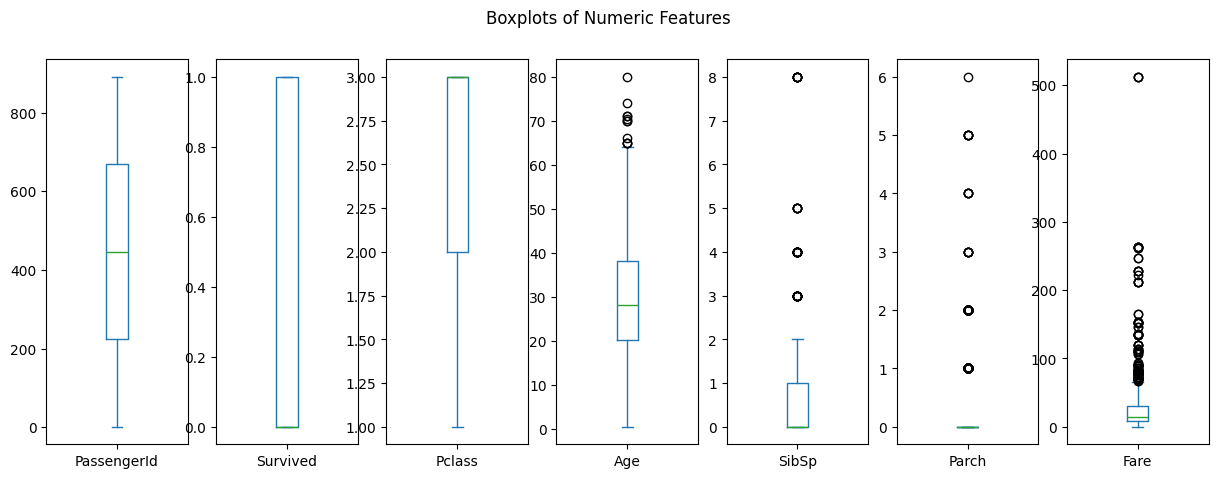

In [ ]:
# Boxplots
plt.figure(figsize=(15, 8))
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(15, 5), sharey=False)
plt.suptitle('Boxplots of Numeric Features')
plt.show()

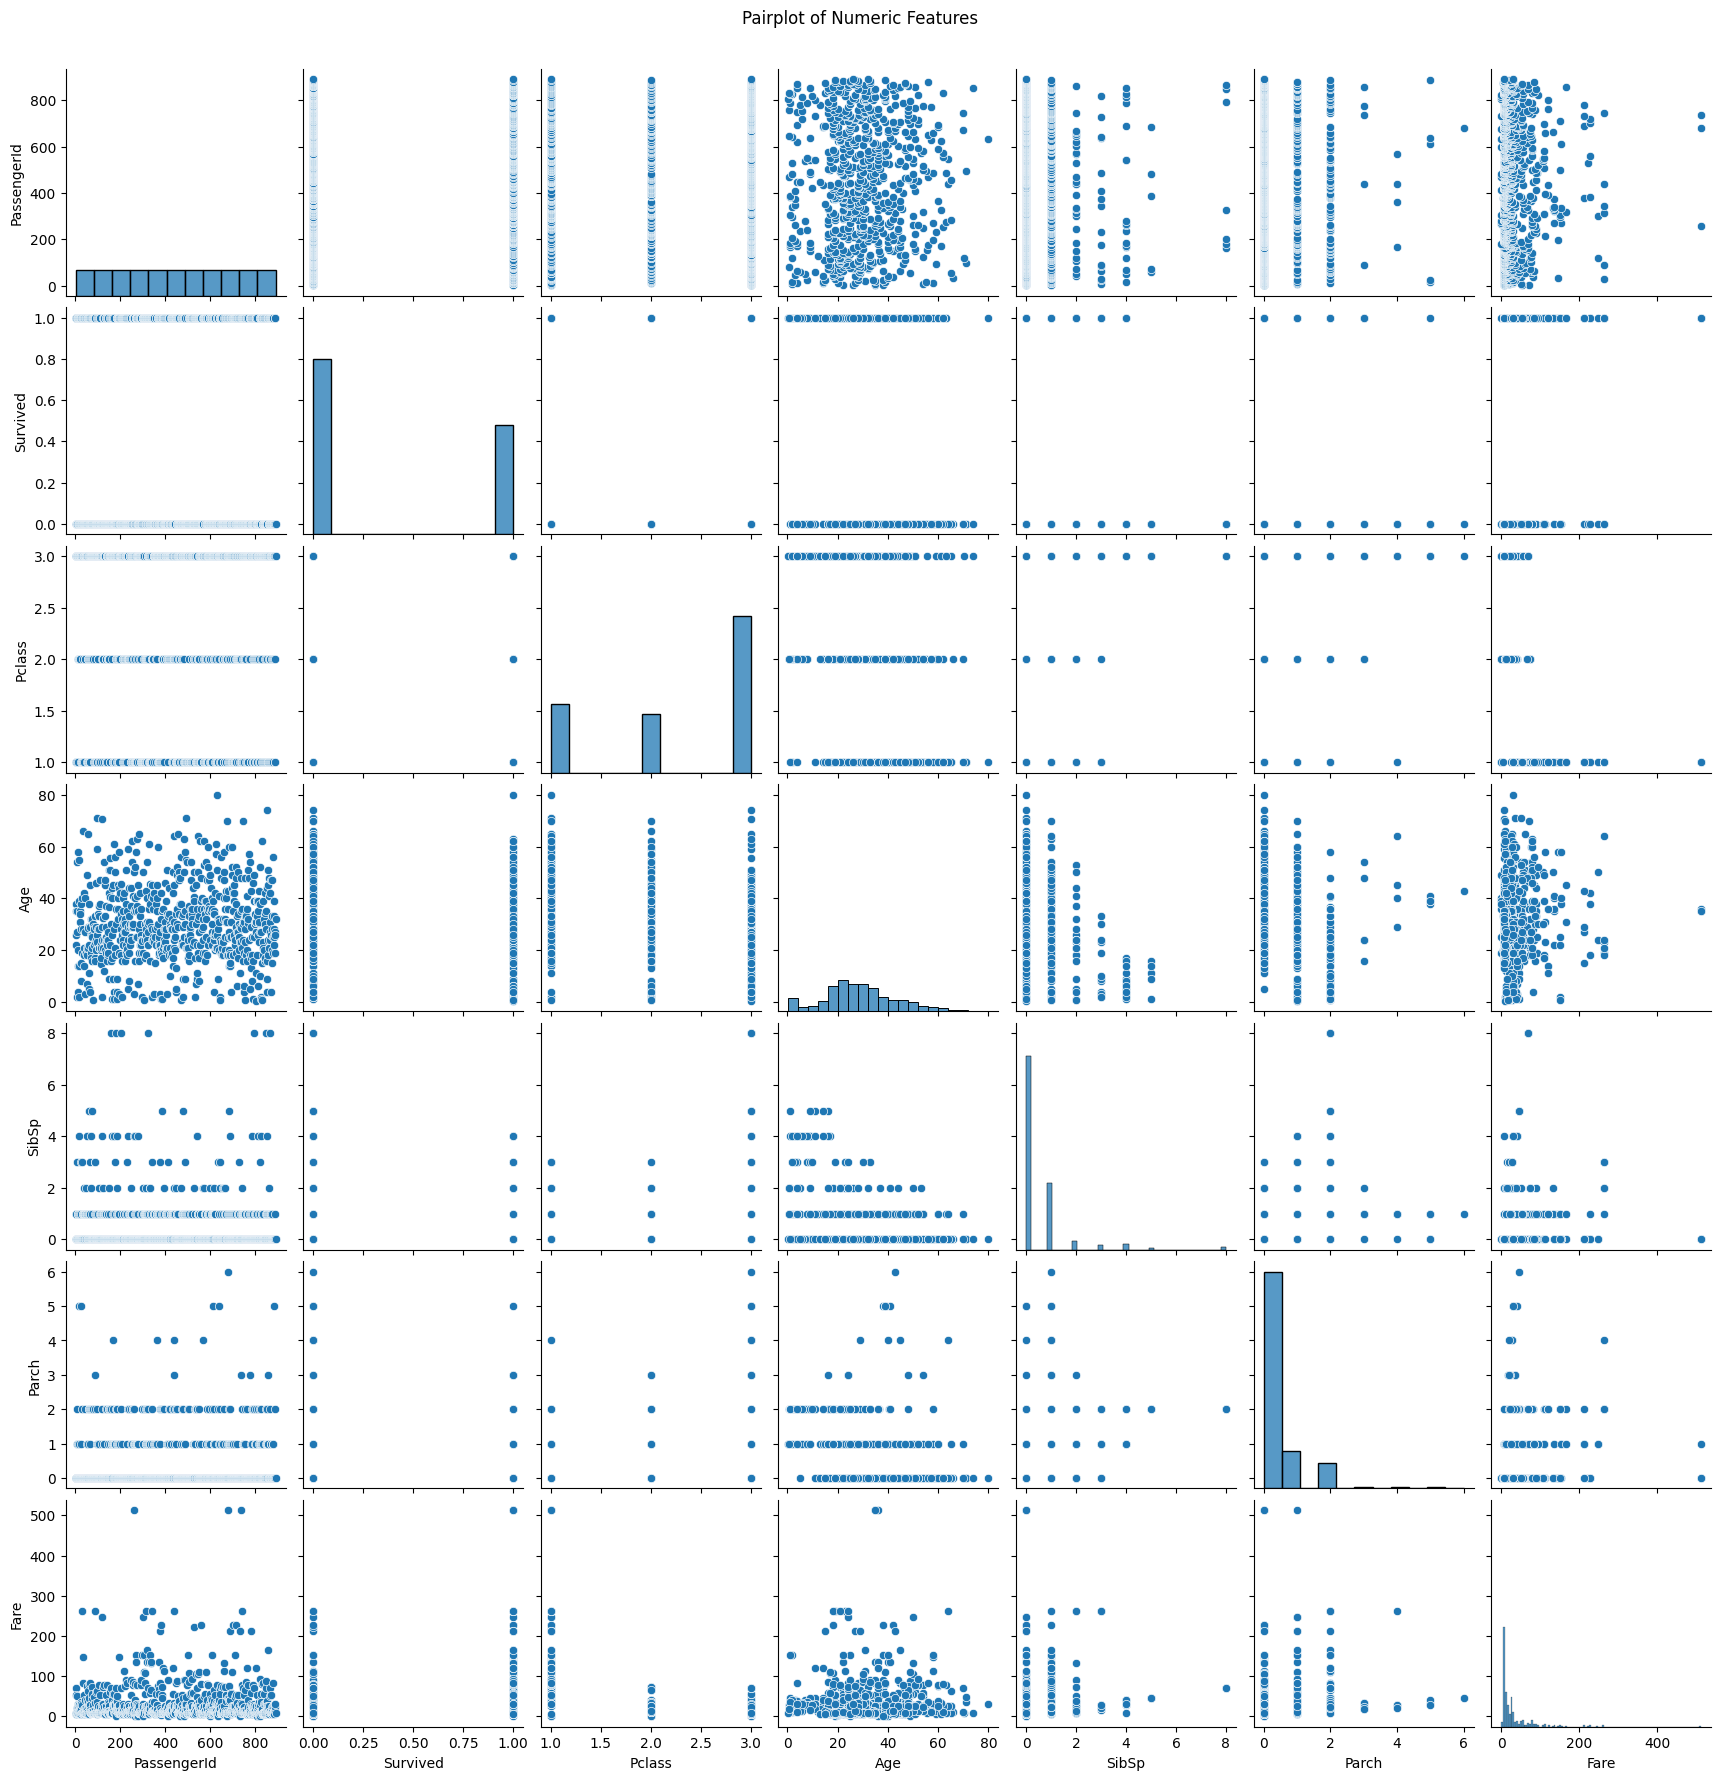

In [ ]:
# 3. Pairplot and Correlation Matrix
# Pairplot (for small datasets)
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

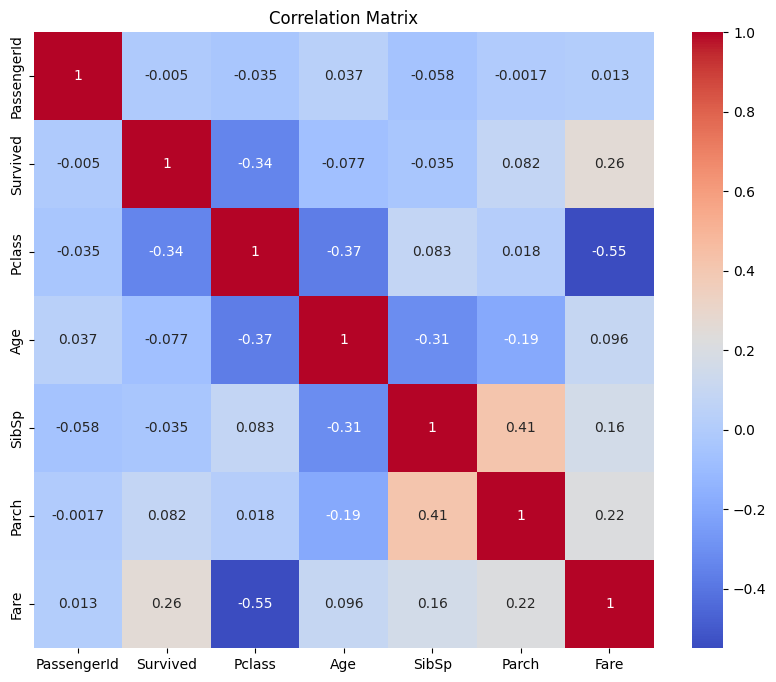

In [ ]:
# Correlation Matrix
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 4. Patterns, Trends, or Anomalies - Interactive Plotly Example
for col in numeric_cols:
    fig = px.histogram(df, x=col, title=f'Interactive Histogram of {col}')
    fig.show()

In [ ]:
# 5. Basic feature-level inference example
print("Features with high skewness:")
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print(skewness)

print("\nHighly correlated feature pairs (|corr| > 0.75):")
threshold = 0.75
corr_pairs = corr.abs().unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > threshold)]
print(high_corr)

Features with high skewness:
Fare           4.787317
SibSp          3.695352
Parch          2.749117
Survived       0.478523
Age            0.389108
PassengerId    0.000000
Pclass        -0.630548
dtype: float64

Highly correlated feature pairs (|corr| > 0.75):
Series([], dtype: float64)
